<a href="https://colab.research.google.com/github/soumyabrataroy/StockPriceForecast/blob/main/Stock_Price_Forecast_V2_with_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

# Start

Getting Stock Price

In [2]:
# Importing different libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

# used Reliance industries stock price 
data = yf.Ticker('SBIN.NS')

# get historical market data of stock from the begining
hist_stock = data.history(period="max")

Getting SENSEX data

In [3]:
# Sensex Ticker is '^BSESN' in Yahoo Finance website
data = yf.Ticker('^BSESN')

# get historical market data of stock
hist_sensex = data.history(period="max")

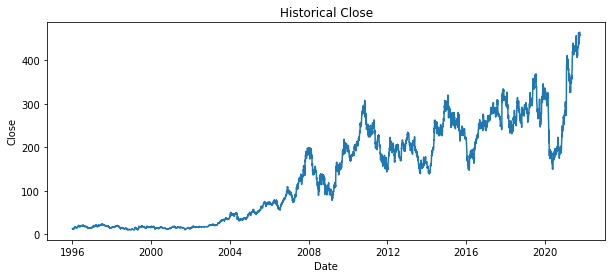

In [4]:
# Here I have visualizes the stock data for Reliance
plt.figure(figsize=(10,4))
plt.plot(hist_stock.index, hist_stock['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Historical Close");

**Stock Price Data**

In [5]:
hist_stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-01,448.500000,455.549988,443.799988,451.649994,14777309,0.0,0.0
2021-10-04,453.799988,464.399994,451.600006,463.149994,16246765,0.0,0.0
2021-10-05,462.000000,469.000000,458.700012,464.700012,16487568,0.0,0.0
2021-10-06,465.000000,471.000000,453.649994,457.200012,19056690,0.0,0.0
2021-10-07,462.100006,464.000000,457.100006,457.899994,9976846,0.0,0.0


SENSEX Data

In [6]:
hist_sensex.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-01,58889.769531,58890.078125,58551.140625,58765.578125,10200,0,0
2021-10-04,59143.000000,59548.820312,58952.109375,59299.320312,10000,0,0
2021-10-05,59320.140625,59778.871094,59127.039062,59744.878906,12900,0,0
2021-10-06,59942.000000,59963.570312,59079.859375,59189.730469,7000,0,0
2021-10-07,59632.808594,59914.910156,59597.058594,59677.828125,0,0,0


In [7]:
#Getting data from Google Sheet
sheet_id = '1DKQvp-dq7si_AaeVlWoTJnIT1d3Bq6Ky1uYaRvg5ErQ'
sheet_name = 'MMI_Data'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [8]:
tickertape_mmi=pd.read_csv(url)

In [9]:
tickertape_mmi

,Date,Market Mood Index,Nifty Index,Unnamed: 3,Unnamed: 4
0,10-07-2021,35.52000,17853.20,NaN,NaN
1,10-06-2021,40.85000,17853.20,NaN,NaN
2,10-05-2021,47.70000,17546.65,NaN,NaN
3,10-04-2021,42.75000,17853.20,NaN,NaN
4,10-01-2021,40.28000,17853.20,NaN,NaN
...,...,...,...,...,...
2331,03-16-2012,43.21962,5317.90,NaN,NaN
2332,03-15-2012,52.37189,5380.50,NaN,NaN
2333,03-14-2012,64.82522,5463.90,NaN,NaN
2334,03-13-2012,64.14598,5429.50,NaN,NaN


In [10]:
#changing Date column to YYYY-MM-DD format
tickertape_mmi["Date"] = pd.to_datetime(tickertape_mmi["Date"]).dt.strftime('%Y-%m-%d')
tickertape_mmi

,Date,Market Mood Index,Nifty Index,Unnamed: 3,Unnamed: 4
0,2021-10-07,35.52000,17853.20,NaN,NaN
1,2021-10-06,40.85000,17853.20,NaN,NaN
2,2021-10-05,47.70000,17546.65,NaN,NaN
3,2021-10-04,42.75000,17853.20,NaN,NaN
4,2021-10-01,40.28000,17853.20,NaN,NaN
...,...,...,...,...,...
2331,2012-03-16,43.21962,5317.90,NaN,NaN
2332,2012-03-15,52.37189,5380.50,NaN,NaN
2333,2012-03-14,64.82522,5463.90,NaN,NaN
2334,2012-03-13,64.14598,5429.50,NaN,NaN


In [11]:
#changing the date column to date index
tickertape_mmi.set_index(tickertape_mmi['Date'], drop=False, append=False, inplace=True, verify_integrity=False)

In [12]:
tickertape_mmi[['Market Mood Index']]

,Market Mood Index
Date,
2021-10-07,35.52000
2021-10-06,40.85000
2021-10-05,47.70000
2021-10-04,42.75000
2021-10-01,40.28000
...,...
2012-03-16,43.21962
2012-03-15,52.37189
2012-03-14,64.82522


Create Merged Data

In [13]:
# for simplicity, took only Stock 'Close' and 'Volume' data
stock_close = hist_stock[['Close','Volume']]

# for simplicity, took only Sensex 'Close' and 'Volume' data
sensex_close = hist_sensex[['Close','Volume']]

#Inner Join the above two data tables
merged_data = pd.merge(stock_close, sensex_close, on =None, how ='inner', left_index=True, right_index=True, suffixes=('_stock', '_sensex'))

In [14]:
# for simplicity, took only Sensex 'Close' and 'Volume' data
mmi_indicator = tickertape_mmi[['Market Mood Index','Nifty Index']]

#Inner Join the above two data tables
merged_data = pd.merge(mmi_indicator, merged_data, on =None, how ='inner', left_index=True, right_index=True)

In [15]:
merged_data.tail()

,Market Mood Index,Nifty Index,Close_stock,Volume_stock,Close_sensex,Volume_sensex
Date,,,,,,
2021-10-01,40.28,17853.20,451.649994,14777309,58765.578125,10200
2021-10-04,42.75,17853.20,463.149994,16246765,59299.320312,10000
2021-10-05,47.70,17546.65,464.700012,16487568,59744.878906,12900
2021-10-06,40.85,17853.20,457.200012,19056690,59189.730469,7000
2021-10-07,35.52,17853.20,457.899994,9976846,59677.828125,0


**Getting only Stock close, sensex data, MMI data**

In [16]:
data = merged_data[['Close_stock','Close_sensex','Market Mood Index']]

In [17]:
# Null value check
data = data.dropna()
data.isnull().sum()

Close_stock          0
Close_sensex         0
Market Mood Index    0
dtype: int64

200 Days Moving Average

In [18]:
data.insert(loc=1,column='200_MA_stock', value = data['Close_stock'].rolling(200).mean())

21 Days Moving Average

In [19]:
data.insert(loc=1,column='21_MA_stock', value = data['Close_stock'].rolling(21).mean())

13 Days Moving Average

In [20]:
data.insert(loc=1,column='13_MA_stock', value = data['Close_stock'].rolling(13).mean())

5 Days Moving Average

In [21]:
data.insert(loc=1,column='5_MA_stock', value = data['Close_stock'].rolling(5).mean())

In [22]:
data.head()

,Close_stock,5_MA_stock,13_MA_stock,21_MA_stock,200_MA_stock,Close_sensex,Market Mood Index
Date,,,,,,,
2012-03-12,209.948807,NaN,NaN,NaN,NaN,17587.669922,60.44333
2012-03-13,211.466095,NaN,NaN,NaN,NaN,17813.619141,64.14598
2012-03-14,213.946442,NaN,NaN,NaN,NaN,17919.300781,64.82522
2012-03-15,208.903992,NaN,NaN,NaN,NaN,17675.849609,52.37189
2012-03-16,202.416870,209.336441,NaN,NaN,NaN,17466.199219,43.21962


Creating the RSI indicator

In [23]:
change = data['Close_stock'].diff(1)


is_gain, is_loss = change > 0, change < 0
gain, loss = change, -change


gain[is_loss] = 0
loss[is_gain] = 0


gain.name = 'gain'
loss.name = 'loss'


n = 14
avg_gain = change * np.nan
avg_loss = change * np.nan


avg_gain[n] = gain[:n+1].mean()
avg_loss[n] = loss[:n+1].mean()


avg_gain.name = 'avg_gain'
avg_loss.name = 'avg_loss'


avg_df = pd.concat([gain, loss, avg_gain, avg_loss], axis=1)
print(avg_df.iloc[:16,:])

                gain      loss  avg_gain  avg_loss
Date                                              
2012-03-12       NaN       NaN       NaN       NaN
2012-03-13  1.517288  0.000000       NaN       NaN
2012-03-14  2.480347  0.000000       NaN       NaN
2012-03-15  0.000000  5.042450       NaN       NaN
2012-03-16  0.000000  6.487122       NaN       NaN
2012-03-19  0.000000  6.391647       NaN       NaN
2012-03-20  2.707474  0.000000       NaN       NaN
2012-03-21  4.133942  0.000000       NaN       NaN
2012-03-22  0.000000  6.564331       NaN       NaN
2012-03-23  0.558762  0.000000       NaN       NaN
2012-03-26  0.000000  4.479172       NaN       NaN
2012-03-27  1.063019  0.000000       NaN       NaN
2012-03-28  0.000000  4.533676       NaN       NaN
2012-03-29  0.000000  1.626328       NaN       NaN
2012-03-30  3.179947  0.000000  1.117198  2.508909
2012-04-02  3.093613  0.000000       NaN       NaN


In [24]:
period = n


# used (len(avg_df)-1) because if I use len(avg_df), the assigning value will be out of bound
for n in range(period,len(avg_df)-1):
    
    avg_df['avg_gain'][n+1] = (((avg_df['avg_gain'][n])*(period-1))+(avg_df['gain'][n+1]))/period
    avg_df['avg_loss'][n+1] = (((avg_df['avg_loss'][n])*(period-1))+(avg_df['loss'][n+1]))/period

In [25]:
avg_df.tail(10)

,gain,loss,avg_gain,avg_loss
Date,,,,
2021-09-24,0.000000,9.049988,3.221349,2.800250
2021-09-27,5.850006,0.000000,3.409110,2.600232
2021-09-28,0.000000,1.700012,3.165603,2.535931
2021-09-29,15.100006,0.000000,4.018060,2.354793
2021-09-30,0.000000,7.000000,3.731056,2.686593
2021-10-01,0.000000,1.350006,3.464552,2.591123
2021-10-04,11.500000,0.000000,4.038512,2.406043
2021-10-05,1.550018,0.000000,3.860763,2.234182
2021-10-06,0.000000,7.500000,3.584994,2.610312


In [26]:
avg_df['Relative Strength'] = avg_df['avg_gain']/avg_df['avg_loss']
avg_df['RSI'] = avg_df['Relative Strength'].apply(lambda x: 100-(100/(x+1)))
avg_df

,gain,loss,avg_gain,avg_loss,Relative Strength,RSI
Date,,,,,,
2012-03-12,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13,1.517288,0.000000,NaN,NaN,NaN,NaN
2012-03-14,2.480347,0.000000,NaN,NaN,NaN,NaN
2012-03-15,0.000000,5.042450,NaN,NaN,NaN,NaN
2012-03-16,0.000000,6.487122,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-10-01,0.000000,1.350006,3.464552,2.591123,1.337085,57.211656
2021-10-04,11.500000,0.000000,4.038512,2.406043,1.678487,62.665496
2021-10-05,1.550018,0.000000,3.860763,2.234182,1.728043,63.343683


In [27]:
# quickly inserting the RSI values in the main data frame
data.insert(loc=2,column='RSI', value = avg_df['RSI'])
data

,Close_stock,5_MA_stock,RSI,13_MA_stock,21_MA_stock,200_MA_stock,Close_sensex,Market Mood Index
Date,,,,,,,,
2012-03-12,209.948807,NaN,NaN,NaN,NaN,NaN,17587.669922,60.44333
2012-03-13,211.466095,NaN,NaN,NaN,NaN,NaN,17813.619141,64.14598
2012-03-14,213.946442,NaN,NaN,NaN,NaN,NaN,17919.300781,64.82522
2012-03-15,208.903992,NaN,NaN,NaN,NaN,NaN,17675.849609,52.37189
2012-03-16,202.416870,209.336441,NaN,NaN,NaN,NaN,17466.199219,43.21962
...,...,...,...,...,...,...,...,...
2021-10-01,451.649994,451.229999,57.211656,447.957693,441.630952,380.027884,58765.578125,40.28000
2021-10-04,463.149994,454.539996,62.665496,449.442308,443.221428,381.004249,59299.320312,42.75000
2021-10-05,464.700012,458.500000,63.343683,449.519231,444.807143,381.992329,59744.878906,47.70000


In [28]:
#removing Null values from the data
data  = data.dropna()
data

,Close_stock,5_MA_stock,RSI,13_MA_stock,21_MA_stock,200_MA_stock,Close_sensex,Market Mood Index
Date,,,,,,,,
2013-01-03,228.651886,223.424969,73.339222,219.913794,216.848264,196.043956,19764.779297,74.67867
2013-01-04,230.048798,225.244672,74.518221,221.098298,217.937038,196.144456,19784.080078,79.11525
2013-01-07,228.281845,226.874731,70.284328,221.975737,218.799601,196.228534,19691.419922,78.07691
2013-01-08,230.664017,228.870206,72.548822,222.834317,219.619652,196.312122,19742.519531,77.08811
2013-01-09,233.388489,230.207007,74.904300,223.905319,220.529793,196.434545,19666.589844,76.83194
...,...,...,...,...,...,...,...,...
2021-10-01,451.649994,451.229999,57.211656,447.957693,441.630952,380.027884,58765.578125,40.28000
2021-10-04,463.149994,454.539996,62.665496,449.442308,443.221428,381.004249,59299.320312,42.75000
2021-10-05,464.700012,458.500000,63.343683,449.519231,444.807143,381.992329,59744.878906,47.70000


In [29]:
#rearranging the data for the model
new_data = data[['Market Mood Index','Close_sensex','RSI','200_MA_stock','21_MA_stock','13_MA_stock','5_MA_stock','Close_stock']]

In [30]:
new_data.tail(10)

,Market Mood Index,Close_sensex,RSI,200_MA_stock,21_MA_stock,13_MA_stock,5_MA_stock,Close_stock
Date,,,,,,,,
2021-09-24,50.89761,60048.468750,53.496573,375.228544,434.283334,440.453848,441.129999,440.750000
2021-09-27,48.39000,60077.878906,56.730173,376.238089,435.990477,441.800002,442.959998,446.600006
2021-09-28,44.06000,59667.601562,55.521951,377.192813,437.535714,442.842309,444.179999,444.899994
2021-09-29,42.58000,59413.269531,63.049628,378.187365,439.311904,444.973079,448.409998,460.000000
2021-09-30,42.24000,59126.359375,58.137422,379.116697,440.595238,446.523078,449.050000,453.000000
2021-10-01,40.28000,58765.578125,57.211656,380.027884,441.630952,447.957693,451.229999,451.649994
2021-10-04,42.75000,59299.320312,62.665496,381.004249,443.221428,449.442308,454.539996,463.149994
2021-10-05,47.70000,59744.878906,63.343683,381.992329,444.807143,449.519231,458.500000,464.700012
2021-10-06,40.85000,59189.730469,57.866291,382.928541,446.052383,449.757693,457.940002,457.200012


In [31]:
val_len = 20
test_len = 10

Training set

In [32]:
#getting the all the data except last 5 values
training_set = new_data.iloc[:-(val_len + test_len),:].values
training_set.shape

(2083, 8)

In [33]:
training_set

array([[7.46786700e+01, 1.97647793e+04, 7.33392218e+01, ...,
        2.19913794e+02, 2.23424969e+02, 2.28651886e+02],
       [7.91152500e+01, 1.97840801e+04, 7.45182213e+01, ...,
        2.21098298e+02, 2.25244672e+02, 2.30048798e+02],
       [7.80769100e+01, 1.96914199e+04, 7.02843278e+01, ...,
        2.21975737e+02, 2.26874731e+02, 2.28281845e+02],
       ...,
       [4.18020700e+01, 5.55557891e+04, 3.84744214e+01, ...,
        4.27919234e+02, 4.16450006e+02, 4.09500000e+02],
       [4.43283500e+01, 5.59589805e+04, 4.47266111e+01, ...,
        4.24892311e+02, 4.15000006e+02, 4.17600006e+02],
       [4.16117400e+01, 5.59442109e+04, 4.39254357e+01, ...,
        4.22923079e+02, 4.13950006e+02, 4.16250000e+02]])

Test Set

In [34]:
#getting only last 2 values of the dataset
test_set = new_data.iloc[len(new_data)-test_len:,:].values
test_set.shape

(10, 8)

In [35]:
test_set

array([[5.08976100e+01, 6.00484688e+04, 5.34965726e+01, 3.75228544e+02,
        4.34283334e+02, 4.40453848e+02, 4.41129999e+02, 4.40750000e+02],
       [4.83900000e+01, 6.00778789e+04, 5.67301725e+01, 3.76238089e+02,
        4.35990477e+02, 4.41800002e+02, 4.42959998e+02, 4.46600006e+02],
       [4.40600000e+01, 5.96676016e+04, 5.55219513e+01, 3.77192813e+02,
        4.37535714e+02, 4.42842309e+02, 4.44179999e+02, 4.44899994e+02],
       [4.25800000e+01, 5.94132695e+04, 6.30496275e+01, 3.78187365e+02,
        4.39311904e+02, 4.44973079e+02, 4.48409998e+02, 4.60000000e+02],
       [4.22400000e+01, 5.91263594e+04, 5.81374215e+01, 3.79116697e+02,
        4.40595238e+02, 4.46523078e+02, 4.49050000e+02, 4.53000000e+02],
       [4.02800000e+01, 5.87655781e+04, 5.72116562e+01, 3.80027884e+02,
        4.41630952e+02, 4.47957693e+02, 4.51229999e+02, 4.51649994e+02],
       [4.27500000e+01, 5.92993203e+04, 6.26654957e+01, 3.81004249e+02,
        4.43221428e+02, 4.49442308e+02, 4.54539996e+02, 4.

Validation Data

In [36]:
#getting only 3 values before last 2 test data of the dataset
val_set = new_data.iloc[len(new_data)- (val_len + test_len):-test_len,:].values
val_set.shape

(20, 8)

In [37]:
val_set

array([[3.63781800e+01, 5.59491016e+04, 4.07248277e+01, 3.54597481e+02,
        4.27990477e+02, 4.21007695e+02, 4.12160004e+02, 4.10750000e+02],
       [4.00152800e+01, 5.61247188e+04, 4.21284667e+01, 3.55688449e+02,
        4.27369049e+02, 4.19396158e+02, 4.13310004e+02, 4.12450012e+02],
       [5.15575600e+01, 5.68897617e+04, 4.98408606e+01, 3.56787564e+02,
        4.26471431e+02, 4.19107697e+02, 4.15950006e+02, 4.22700012e+02],
       [6.18291400e+01, 5.75523906e+04, 5.20882024e+01, 3.57892282e+02,
        4.26197622e+02, 4.18953850e+02, 4.17640002e+02, 4.26049988e+02],
       [6.74951100e+01, 5.73382109e+04, 5.46054571e+01, 3.58958533e+02,
        4.25959526e+02, 4.19165389e+02, 4.20370001e+02, 4.29899994e+02],
       [7.01416800e+01, 5.78525391e+04, 5.44853520e+01, 3.60021310e+02,
        4.25161907e+02, 4.19053849e+02, 4.24170001e+02, 4.29750000e+02],
       [7.22238500e+01, 5.81299492e+04, 5.56411942e+01, 3.61090849e+02,
        4.23945240e+02, 4.19557695e+02, 4.27959998e+02, 4.

In [38]:
day = 3
column = 8
week = day

Feature Scaling

In [39]:
#using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
# scaling training set
training_set_scaled = sc.fit_transform(training_set)

sc_output = MinMaxScaler(feature_range = (0,1))
#scaling training Stock price only
output = sc_output.fit_transform(training_set[:,column-1].reshape(-1,1))

Arrenging X_train, Y_train

In [40]:
#arrenging the data as per the above logic [28 days data to predict the next day data]
tr = len(training_set)

X_train = []
y_train = []
for i in range(week, tr):
  X_train.append(training_set_scaled[i-week:i,0:column])
  y_train.append(training_set_scaled[i,column-1])
X_train,y_train = np.array(X_train), np.array(y_train)

In [41]:
X_train,y_train

(array([[[0.82194257, 0.04884939, 0.79681327, ..., 0.26604485,
          0.27441145, 0.28198407],
         [0.88045571, 0.04935659, 0.81229786, ..., 0.27007824,
          0.28042002, 0.28637747],
         [0.86676126, 0.04692157, 0.75669131, ..., 0.27306604,
          0.28580241, 0.28082026]],
 
        [[0.88045571, 0.04935659, 0.81229786, ..., 0.27007824,
          0.28042002, 0.28637747],
         [0.86676126, 0.04692157, 0.75669131, ..., 0.27306604,
          0.28580241, 0.28082026],
         [0.85372018, 0.04826442, 0.78643243, ..., 0.27598961,
          0.29239138, 0.28831238]],
 
        [[0.86676126, 0.04692157, 0.75669131, ..., 0.27306604,
          0.28580241, 0.28082026],
         [0.85372018, 0.04826442, 0.78643243, ..., 0.27598961,
          0.29239138, 0.28831238],
         [0.8503416 , 0.04626906, 0.81736849, ..., 0.27963651,
          0.29680544, 0.29688106]],
 
        ...,
 
        [[0.54358369, 0.99561899, 0.41505494, ..., 0.99457799,
          0.94512148, 0.8885068

Arrenging X Val, y Val

In [42]:
inputs = new_data.iloc[len(new_data)-(test_len+val_len)-week:-test_len, :].values
inputs = sc.transform(inputs)
X_val = []
y_val = []
for i in range(week, len(inputs)):
  X_val.append(inputs[i-week:i,0:column])
  y_val.append(inputs[i,column-1])
X_val,y_val = np.array(X_val), np.array(y_val)

In [43]:
X_val,y_val

(array([[[0.38833984, 0.9894045 , 0.33891055, 0.98782034, 0.99144506,
          0.97433057, 0.91177174, 0.8507659 ],
         [0.42165843, 1.        , 0.42102474, 0.99390507, 0.98958957,
          0.9640235 , 0.9069839 , 0.87624107],
         [0.38582962, 0.99961187, 0.41050237, 1.        , 0.98843195,
          0.95731801, 0.90351684, 0.87199519]],
 
        [[0.42165843, 1.        , 0.42102474, 0.99390507, 0.98958957,
          0.9640235 , 0.9069839 , 0.87624107],
         [0.38582962, 0.99961187, 0.41050237, 1.        , 0.98843195,
          0.95731801, 0.90351684, 0.87199519],
         [0.31680527, 0.99974039, 0.36846664, 1.00593424, 0.98527926,
          0.95079588, 0.89760633, 0.85469725]],
 
        [[0.38582962, 0.99961187, 0.41050237, 1.        , 0.98843195,
          0.95731801, 0.90351684, 0.87199519],
         [0.31680527, 0.99974039, 0.36846664, 1.00593424, 0.98527926,
          0.95079588, 0.89760633, 0.85469725],
         [0.36477423, 1.00435545, 0.38690157, 1.01173455, 

In [44]:
inputs = new_data.iloc[len(new_data)-test_len-week:, :].values
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(week, len(inputs)):
  X_test.append(inputs[i-week:i,0:column])
  y_test.append(inputs[i,column-1])
X_test,y_test = np.array(X_test), np.array(y_test)

In [45]:
X_test,y_test

(array([[[0.48823784, 1.0800537 , 0.53808409, 1.09971537, 0.99284899,
          1.00726865, 1.01456164, 0.94291672],
         [0.46740614, 1.07800547, 0.53848756, 1.10491628, 0.99766834,
          1.00965225, 1.01125968, 0.94307403],
         [0.44778477, 1.10318166, 0.62070318, 1.11043989, 1.00295565,
          1.01447181, 1.00208023, 0.9775126 ]],
 
        [[0.46740614, 1.07800547, 0.53848756, 1.10491628, 0.99766834,
          1.00965225, 1.01125968, 0.94307403],
         [0.44778477, 1.10318166, 0.62070318, 1.11043989, 1.00295565,
          1.01447181, 1.00208023, 0.9775126 ],
         [0.50829905, 1.10746802, 0.5362065 , 1.11562283, 1.00697862,
          1.01701257, 0.993264  , 0.94904966]],
 
        [[0.44778477, 1.10318166, 0.62070318, 1.11043989, 1.00295565,
          1.01447181, 1.00208023, 0.9775126 ],
         [0.50829905, 1.10746802, 0.5362065 , 1.11562283, 1.00697862,
          1.01701257, 0.993264  , 0.94904966],
         [0.4752267 , 1.1082409 , 0.57867553, 1.12099025, 

Building and training the RNN

Importing the Keras library and packages

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

Initializing the RNN

In [47]:
regressor= Sequential()

Adding the first LSTM and some dropout regularization

In [48]:
regressor.add(LSTM(units= 8, return_sequences= True, input_shape = (week,column)))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [49]:
regressor.add(LSTM(units= 6, return_sequences= True))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [50]:
regressor.add(LSTM(units= 4, return_sequences= True))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [51]:
regressor.add(LSTM(units= 2))
regressor.add(Dropout(0.2))

Adding the output layer

In [52]:
regressor.add(Dense(units= 1))

Compiling the RNN

In [53]:
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

Defining the early stoppingto prevent overfitting

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience=10)

Fitting the RNN to the trainingset

In [55]:
print(X_train.shape,y_train.shape, X_val.shape, y_val.shape)

(2080, 3, 8) (2080,) (20, 3, 8) (20,)


In [56]:
regressor.fit(X_train, y_train, epochs=1000,validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/1000
65/65 [==============================] - 7s 29ms/step - loss: 0.1270 - val_loss: 0.5212
Epoch 2/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0472 - val_loss: 0.2355
Epoch 3/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0298 - val_loss: 0.1314
Epoch 4/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0243 - val_loss: 0.0704
Epoch 5/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0205 - val_loss: 0.0521
Epoch 6/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0182 - val_loss: 0.0439
Epoch 7/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0164 - val_loss: 0.0388
Epoch 8/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0145 - val_loss: 0.0341
Epoch 9/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0159 - val_loss: 0.0336
Epoch 10/1000
65/65 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.030

Plotting Model training loss and validation loss

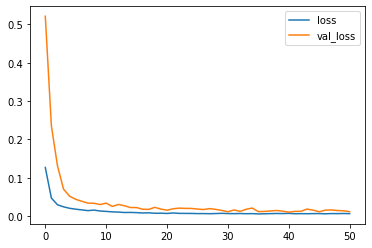

In [57]:
loss_df = pd.DataFrame(regressor.history.history)
loss_df.plot()

Predicting the data

In [58]:
y_pred = regressor.predict(X_test)
y_pred = sc_output.inverse_transform(y_pred)
y_pred

array([[406.73978],
       [407.08148],
       [407.90598],
       [407.02277],
       [408.23904],
       [408.87598],
       [410.56543],
       [409.98196],
       [411.21075],
       [413.37152]], dtype=float32)

In [59]:
y_test=y_test.reshape(-1,1)
y_test = sc_output.inverse_transform(y_test)

In [60]:
np.concatenate((y_test,y_pred), axis =1)

array([[440.75      , 406.73977661],
       [446.6000061 , 407.08148193],
       [444.8999939 , 407.90597534],
       [460.        , 407.02276611],
       [453.        , 408.23904419],
       [451.6499939 , 408.87597656],
       [463.1499939 , 410.56542969],
       [464.70001221, 409.98196411],
       [457.20001221, 411.21075439],
       [457.8999939 , 413.371521  ]])

Visualizing the data

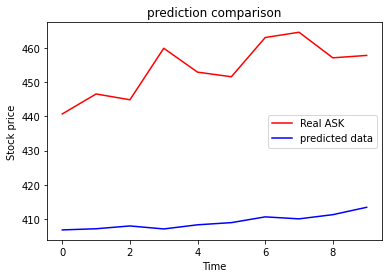

In [61]:
plt.plot(y_test, color = 'red', label='Real ASK')
plt.plot(y_pred, color = 'blue', label='predicted data')
plt.title('prediction comparison')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

Calculating the ME(Mean absolute error) and RMSE(Root meansquare error)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
ME = mean_absolute_error(y_test, y_pred)

In [63]:
100 - ME/np.mean(y_test)*100

90.11299237731083

In [64]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = MSE**.5
RMSE

45.36927529069464

In [65]:
100-RMSE/np.mean(y_test)*100

90.00643738676415

In [66]:
for i in range(0,len(y_test)):
  print(100-RMSE/y_test[i]*100)

[89.70634707]
[89.84118346]
[89.80236549]
[90.13711407]
[89.98470744]
[89.95477119]
[90.20419391]
[90.23686807]
[90.07671171]
[90.09188122]


Predicting the next value

In [67]:
dataset_total = new_data

In [68]:
#getting only last three actual data to predict the forth one
inputs = dataset_total.iloc[len(dataset_total)-week:,:column].values
inputs = sc.transform(inputs)
next_day_value=[]
next_day_value.append(inputs)
next_day_value = np.array(next_day_value)

predicted_data = regressor.predict(next_day_value)
predicted_data = sc_output.inverse_transform(predicted_data)

In [69]:
predicted_data

array([[413.42325]], dtype=float32)

In [70]:
pred_actual=np.concatenate((y_test,y_pred), axis =1)[9][1]

In [71]:
#Predicted growth
print((predicted_data/pred_actual-1))

[[0.00012517]]


# Finish